# Jupyter Data Science Workflow - Part 2
**From exploratory analysis to reproducible science**  
Continue from Reproducible Data Analysis in Jupyter_V3

In [1]:
%matplotlib inline
from jupyterworkflow.data import get_fremont_data
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import pandas as pd 

## Get Data

<AxesSubplot:xlabel='time'>

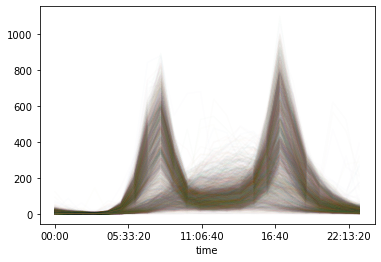

In [2]:
data = get_fremont_data()
pivoted=data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

Look at the **Shape of the Pivot**:  

In this example (3163, 24) equals 3163 days and each observation consists of 24 hours

In [3]:
X = pivoted.T.values
X.shape

(3163, 24)

**Clean Up Data** - due to missing values

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(3163, 24)

## Principal component analysis

In [5]:
X2=PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(3163, 2)

**Scatterplot**  
Shows two clusers

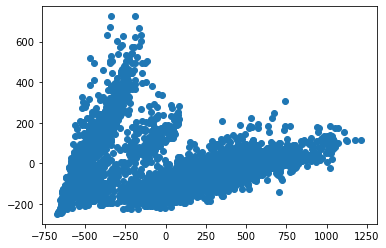

In [6]:
plt.scatter(X2[:,0], X2[:,1])

## Unsupervised Clustering
**Gaussian Mixture**  
To distinguish the identified clusters

In [7]:
gmm=GaussianMixture(2).fit(X)
#if we want to dostinguish more clusters just change the 2 into the number of clusters

labels=gmm.predict(X)
#the labels now show in which cluster the data point is (either 0, or 1)

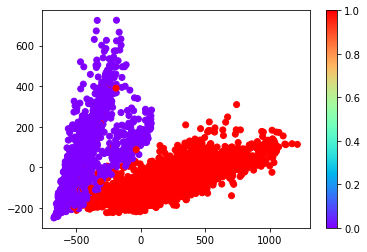

In [8]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

**Plot Pivoted Table**, but depending on labels  
Examine what happens in each cluster

<AxesSubplot:xlabel='time'>

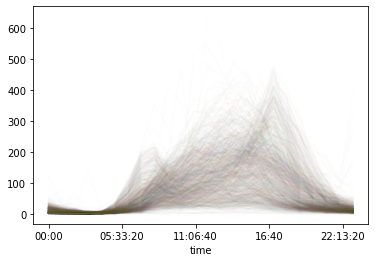

In [9]:
pivoted.T[labels==0].T.plot(legend=False, alpha=0.01)

<AxesSubplot:xlabel='time'>

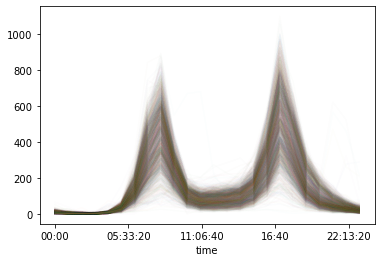

In [10]:
pivoted.T[labels==1].T.plot(legend=False, alpha=0.01)

## Comparing with Day of Week

In [11]:
dayofweek=pd.DatetimeIndex(pivoted.columns).dayofweek

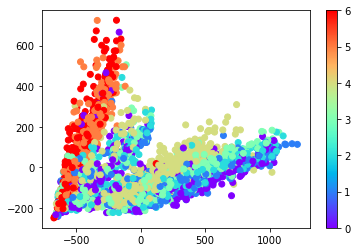

In [12]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

## Analyzing Outliners

**Is Label 1 equal to weekends?**  
- Shows the cases of labels 1 (expected to be weekends) which where actualy during the week  
- This shows, that the Gaussian Mixture did not perform verry well here  

In [13]:
dates=pd.DatetimeIndex(pivoted.columns)
dates[(labels==1)&(dayofweek<5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2020-10-21', '2020-10-28', '2020-11-09', '2021-01-11',
               '2021-01-21', '2021-04-07', '2021-05-03', '2021-05-07',
               '2021-05-17', '2021-05-26'],
              dtype='datetime64[ns]', length=1876, freq=None)

**Is Label 0 equal to weekdays?**  
- Shows the cases of labels 0 (expected to be weekdays) which where actualy during the weekend  
- Here we see less differences

In [14]:
dates=pd.DatetimeIndex(pivoted.columns)
dates[(labels==0)&(dayofweek>4)]

DatetimeIndex(['2012-10-06', '2012-10-07', '2012-10-13', '2012-10-14',
               '2012-10-20', '2012-10-21', '2012-10-27', '2012-10-28',
               '2012-11-03', '2012-11-04',
               ...
               '2021-05-01', '2021-05-02', '2021-05-08', '2021-05-09',
               '2021-05-15', '2021-05-16', '2021-05-22', '2021-05-23',
               '2021-05-29', '2021-05-30'],
              dtype='datetime64[ns]', length=890, freq=None)